##### AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020
<hr>

## <br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>
    <h1 style = "font-size:48px; font-weight:normal"><b>AI</b>-TECH</h1>
    <br>
<br>
<br>
<br>
    <h1 style = "font-size:24px; font-weight:normal">Przykład 2 DO LABORATORIUM 1</h1>
    <h1 style = "font-size:24px">z UCZENIA MASZYNOWEGO</h1>
    <h1 style = "font-size:24px">Regresja liniowa i logistyczna</h1>
    <h1 style = "font-size:24px">Tomasz Neumann</h1>
    <h3 style = "font-size:21px">Metoda gradientu prostego</h3>
</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
    </body>
    </html>

In [ ]:
#@title
%%html
<iframe src="https://www.polskacyfrowa.gov.pl/media/48246/FE_POPC_poziom_pl-1_rgb.jpg" width="800"></iframe>

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej"
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

<hr>

# 1. Przykład 2

Metoda gradientu prostego (<i>gradient descent</i>) polega na wielokrotnym poprawieniu wartości parametrów w celu zminimalizowania funkcji kosztu. W metodzie tej na początku inicjujemy losowymi wartościami wektor parametrów $\theta$, a następnie za pomocą 'małych kroków' dążymy do zredukowania funkcji kosztu (np. wspomnianej w poprzednim przykładzie MSE), aż do momentu uzyskania zbieżności algorytmu z wartością minimalną tejże funkcji.
W metodzie tej ważny jest rozmiar poszczególnych 'kroków', który opisywany jest za pomocą hiperparametru określanego jako współczynnik uczenia (<i>learning rate</i>). Przy wyborze tej wartości należy mieć na uwadze, aby nie była zbyt mała, gdyż algorytm wówczas będzie potrzebował bardzo dużo przebiegów do osiągnięcia oczekiwanej wartości, a co za tym idzie będzie to czasochłonne. Zbyt duża wartość może doprowadzić natomiast do sytuacji w której nastąpi przeoczenie minimum, jednocześnie znajdująć się po drugiej stronie tej doliny, nawet z wartością większą niż początkową. W konsekwencji może doprowadzić do rozbieżności pracy algorytmu, a co za tym idzie, nie będzie można znaleźć rozwiązania.
Należy także mieć na uwadze wybór funkcji kosztu do minimalizacji, gdyż nie wszystkie mają 'ładny kształ' , posiadając minima lokalne, minima globalne i wypłaszczenia, co w przypadku różnych losowych inicjacji poczatkowych, może nie doprowadzić do osiągnięcia globalnego minimum.
W przypadku modelu regresji liniowej funkcja kosztu jest wypukła, stąd nie ma minimów lokalnych (wybór dwóch różnych punktów na jej przebiegu, nigdy nie przetnie się z tą krzywą), stąd istnieje jedno minimum globalne. Dlatego metoda gradientu prostego pozwala na zbliżenie się do minimum globalnego przy odpowiedniej wartości współczynnika uczenia oraz po wystarczająco długim czasie, co zostanie przedstawione w dalszych fragmentach kodu.
W celu implementacji metody gradientu prostego, należy obliczyć gradient funkcji kosztu (jej zmianę) przy niewielkiej modyfikacji parametru $\theta_j$
$$\dfrac{\partial}{\partial \theta_j}MSE(\boldsymbol\theta) = \dfrac{2}{m}\sum_{i=1}^{m}\big(\boldsymbol{\theta}^T\mathbf{x}^{i} - y^{(i)}\big)x_j^{(i)},$$
lub wyliczyć wszystkie od razu
$$\nabla_{\theta}MSE(\boldsymbol\theta) = \dfrac{2}{m}\mathbf{X}^T(\mathbf{X}\theta -\mathbf{y}).$$
Z powyższych wyliczeń można określić krok gradientu prostego, wykorzystując wcześniej wspomniany współczynnik uczenia
$$\boldsymbol{\theta}^{(i+1)} = \boldsymbol{\theta}^{(i)} - \eta \nabla_{\theta}MSE(\boldsymbol\theta).$$
Przykład rozpoczynamy od dołączenia bibliotek ułatwiających dalszą implementację

In [ ]:
# Import podstawowych bibliotek języka Python
import numpy as np  # operacje numeryczne
import matplotlib  # wykresy i ich ustawienia
import matplotlib.pyplot as plt  # tworzenie wykresu

a następnie od zdefiniowania modelu oraz jego gradientu jak i ustaleniu początkowych wartości brzegowych.

In [ ]:
# Zdefiniowanie modelu
def model(a):
    return a**2


# Wyliczenie gradientu funkcji z modelu
def df(a):
    return 2 * a


# Inicjalizacja punktu początkowego
xs = 4
y = model(xs)

W tym kroku zostaną zdefiniowane wartości parametrów optymalizujących, takich jak współczynnik uczenia oraz wartość prezycji, przy której zostaną zakończone wyliczenia oraz tablica, która będzie przechowywać wartości $x$ i $y$ po poszczególnych iteracjach.

In [ ]:
# Zdefiniowanie parametrów optymalizujących
eta = 0.05  # współczynnik uczenia (learning rate)
precision = 0.001  # wartość progu dla bezwzględnej różnicy między poprzednim x a aktualnym x

x = xs
step_size = abs(x)

dataset = np.array([])
dataset = np.append(dataset, [x, y])
print(dataset)

[ 4. 16.]


Poniższa pętla będzie wykonywała się, aż nie zostanie osiągniety pewien próg dokładności.

In [ ]:
i = 0 #licznik kroków

# chcemy znaleźć takie x, dla których y będzie minimalne
# dla wartości początkowych
x_min = xs
y_min = y

while step_size > precision:
    x_p = x                       # zapamiętanie poprzedniej wartości x
    x = x_p - eta * df(x_p)         # zaktualizowanie wartości x
    print("Actual x {}\n".format(x))
    step_size = abs(x - x_p)      # wyliczenie zmiany pomiędzy x a x_p
    y = model(x)                  # obliczenie aktualnej wartości y dla aktualnego x
    # warunek sprawdzający, czy y jest minimalny?
    if y < y_min:
      y_min = y
      x_min = x
    dataset = np.append(dataset, [x, y])
    i = i+1

Actual x 3.6

Actual x 3.24

Actual x 2.9160000000000004

Actual x 2.6244000000000005

Actual x 2.3619600000000003

Actual x 2.125764

Actual x 1.9131876

Actual x 1.72186884

Actual x 1.549681956

Actual x 1.3947137604

Actual x 1.25524238436

Actual x 1.129718145924

Actual x 1.0167463313316

Actual x 0.91507169819844

Actual x 0.8235645283785961

Actual x 0.7412080755407364

Actual x 0.6670872679866627

Actual x 0.6003785411879965

Actual x 0.5403406870691968

Actual x 0.4863066183622771

Actual x 0.4376759565260494

Actual x 0.39390836087344444

Actual x 0.3545175247861

Actual x 0.31906577230749

Actual x 0.287159195076741

Actual x 0.2584432755690669

Actual x 0.2325989480121602

Actual x 0.20933905321094418

Actual x 0.18840514788984974

Actual x 0.16956463310086478

Actual x 0.1526081697907783

Actual x 0.13734735281170046

Actual x 0.12361261753053042

Actual x 0.11125135577747738

Actual x 0.10012622019972964

Actual x 0.09011359817975667

Actual x 0.081102238361781

Actual x

Poniższa funkcja umożliwia w dalszej części zwizualizować początkowe dane wejściowe z tymi które zostały uzyskane za pomocą algorytmu optymalizującego.

In [ ]:
#@title <p> <i>plot_data(points, f, x_m)</i> - funkcja pozwalająca wyświetlic działanie algorytmu optymalizującego metodą gradientu prostego</p>
# Wykreślenie funkcji i punktów specjalnych
def plot_data(points, f, x_m):
    rows = int(len(points) / 2)
    points = np.reshape(points, (rows, 2))

    y_m = f(x_m)

    # ustawienia wyświetlania wykresu
    matplotlib.rcParams.update({'font.size': 14})
    fig = plt.figure(figsize=(10, 8), dpi=72)
    p1 = fig.add_subplot(111)
    p1.set_xlabel('x')
    p1.set_ylabel('y')
    p1.plot(x_m, y_m, 'k')
    makersize = 28

    # narysowanie wartości początkowych x i y
    p1.plot(points[0][0], points[0][1], marker='o', markersize=makersize, markerfacecolor="none", color="red")

    for pos in range(1, rows):
        if makersize > 4:
            makersize = makersize - 2
        p1.plot(points[pos][0], points[pos][1], marker='o', markersize=makersize, markerfacecolor="none", color="red")

    # wykreślenie wyniku końcowego
    p1.plot(points[rows-1][0], points[rows-1][1], marker='x', markersize=20, markerfacecolor="none", color="blue")
    plt.show()

Poniższa część informuje nas o wartości punktu minimum lokalnego przy wyznaczonej wartości zmiennej niezależnej oraz wykreśla poszczególne kroki prowadzące do tej wartości na wykresie.

Wyznaczone minimum lokalne dla y wynosi 7.875009E-05 i występuje dla wartości x równego 8.874125E-03
Liczba iteracji wykonana do uzyskania tego wyniku wynosi: 58


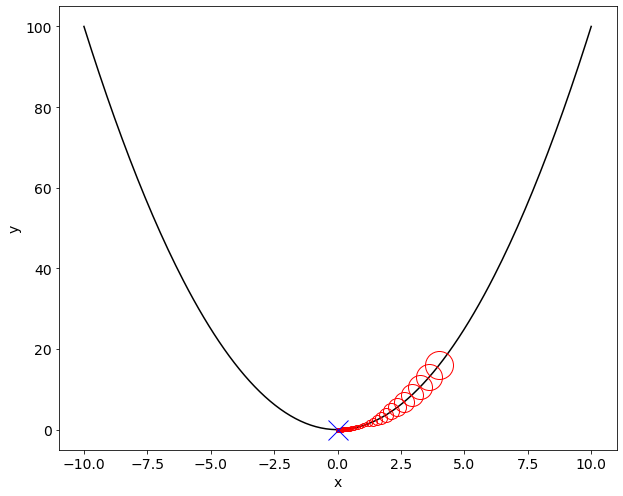

In [ ]:
print("Wyznaczone minimum lokalne dla y wynosi {0:E} i występuje dla wartości x równego {1:E}".format(y_min, x_min))
print("Liczba iteracji wykonana do uzyskania tego wyniku wynosi:", i)

# Parametry wykresu oraz jego wykreślenie
n = 200
x_n = np.linspace(-10, 10, n)
x_v = np.array(x_n).astype(np.float32)
plot_data(dataset, model, x_v)


# Zadania do wykonania

<p><b>Zadanie 1</b></p>
Przeprowadź eksperymenty dla różnych wartości początkowych.


<p><b>Zadanie 2</b></p>
Przeprowadź eksperymenty dla różnych współczynników uczenia badając jednocześnie ilość iteracji potrzebnych do osiągnięcia odpowiedniego wyniku. Czy dla badanego przypadku można uzyskać rozbieżność algorytmu?

In [ ]:
#@title
%%html
<iframe src="https://www.polskacyfrowa.gov.pl/media/48246/FE_POPC_poziom_pl-1_rgb.jpg" width="800"></iframe>

In [ ]:
xs=15
y = model(xs)

In [ ]:
# Zdefiniowanie parametrów optymalizujących
eta = 0.005  # współczynnik uczenia (learning rate)
precision = 0.001  # wartość progu dla bezwzględnej różnicy między poprzednim x a aktualnym x

x = xs
step_size = abs(x)

dataset = np.array([])
dataset = np.append(dataset, [x, y])
print(dataset)

[ 15. 225.]


In [ ]:
i = 0 #licznik kroków

# chcemy znaleźć takie x, dla których y będzie minimalne
# dla wartości początkowych
x_min = xs
y_min = y

while step_size > precision:
    x_p = x                       # zapamiętanie poprzedniej wartości x
    x = x_p - eta * df(x_p)         # zaktualizowanie wartości x
    #print("Actual x {}\n".format(x))
    step_size = abs(x - x_p)      # wyliczenie zmiany pomiędzy x a x_p
    y = model(x)                  # obliczenie aktualnej wartości y dla aktualnego x
    # warunek sprawdzający, czy y jest minimalny?
    if y < y_min:
      y_min = y
      x_min = x
    dataset = np.append(dataset, [x, y])
    i = i+1

Wyznaczone minimum lokalne dla y wynosi 9.713531E-03 i występuje dla wartości x równego 9.855725E-02
Liczba iteracji wykonana do uzyskania tego wyniku wynosi: 500


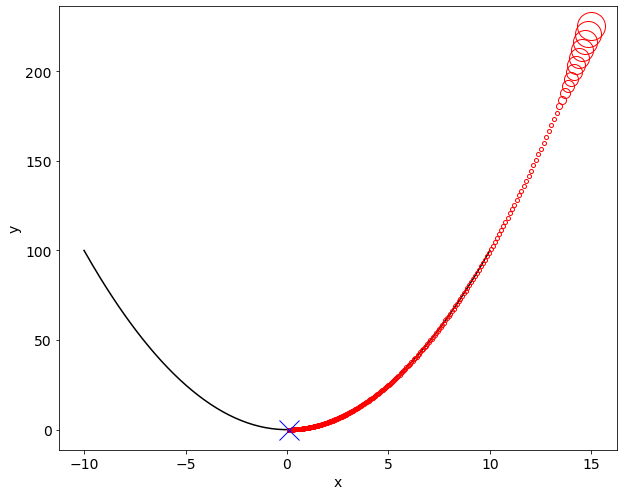

In [ ]:
print("Wyznaczone minimum lokalne dla y wynosi {0:E} i występuje dla wartości x równego {1:E}".format(y_min, x_min))
print("Liczba iteracji wykonana do uzyskania tego wyniku wynosi:", i)

# Parametry wykresu oraz jego wykreślenie
n = 200
x_n = np.linspace(-10, 10, n)
x_v = np.array(x_n).astype(np.float32)
plot_data(dataset, model, x_v)